In [2]:
%load_ext autoreload
%autoreload 2
import os
import typing as T
import pickle as pkl
import matplotlib.pyplot as plt

import cv2
import yaml
import requests
import torch
import torch.nn as nn
import numpy as np
from xarray import DataArray
from tqdm.auto import tqdm

/Users/gkreder/miniconda3/envs/novel-designer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# image_blue_path = "/Users/gkreder/Downloads/nuclear_blue_image.jpg"
# cv2.imread(image_blue_path).shape
# img = cv2.imread(image_blue_path)
# plt.imshow(cv2.pyrDown(img))
# plt.imshow(img)

In [97]:
input_image = cv2.imread("../tmp/user_input.jpeg")
input_image.shape

(800, 1400, 3)

In [39]:
input_image = np.load("../tmp/image_db/input_images/amiable-crocodile.npy")

In [40]:
input_image.shape

(1, 1, 256, 256)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def display_image_from_npy(file_path, axes_order):
    """
    Display an image from a .npy file with arbitrary dimensions and axes labeling.

    :param file_path: Path to the .npy file.
    :param axes_order: A string indicating the order of axes, e.g., 'bcxy' or 'bxcy'.
    """
    axes_order = axes_order.lower()
    # Load the image data
    image_data = np.load(file_path)

    # Assuming the first axis is the batch size, we take the first image in the batch
    image = image_data[0]

    # Adjust the axes if necessary
    if axes_order.startswith('c'):  # If color channel is first
        # Move color channel to the last dimension
        image = np.moveaxis(image, 0, -1)

    # Check if the image is grayscale (single channel)
    if image.shape[-1] == 1:
        # Remove the color channel axis for displaying
        image = image.squeeze()

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()


In [43]:
file_path = "../tmp/image_db/input_images/affable-shark.npy"
axes_order = 'bcxy'
image_data = np.load(file_path)

In [66]:
from bioimageio_chatbot.image_processor import *

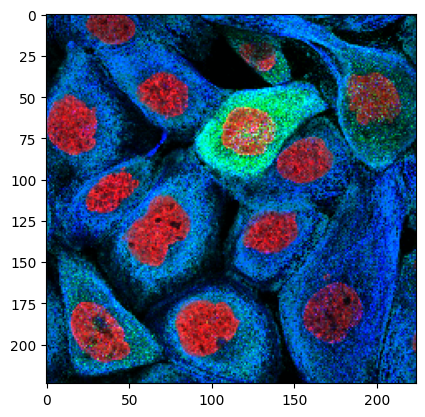

In [179]:
ip = ImageProcessor()
input_image = np.load("../tmp/image_db/input_images/polite-pig.npy")
resized_image = ip.resize_image(input_image, current_format = "bcyx", output_format = "yxc", grayscale = False)
plt.imshow(resized_image[:,:,:])

In [100]:
resized_image.astype('float')

array([[[6.15839389e-05, 5.91930404e-02, 1.33820752e-01],
        [6.15839389e-05, 2.86838551e-01, 5.00213419e-01],
        [6.15839389e-05, 2.33132694e-01, 2.48683747e-01],
        ...,
        [6.15839389e-05, 4.84454902e-03, 7.81813034e-02],
        [6.15839389e-05, 3.61806161e-02, 1.26238339e-01],
        [6.15839389e-05, 5.91930404e-02, 3.12341684e-01]],

       [[6.15839389e-05, 3.50956544e-01, 5.63002047e-01],
        [6.15839389e-05, 3.06668406e-01, 4.91765165e-01],
        [6.15839389e-05, 1.20629399e-01, 2.96740990e-01],
        ...,
        [6.15839389e-05, 1.32086118e-01, 2.78638585e-01],
        [6.15839389e-05, 5.47252027e-02, 9.84928908e-02],
        [6.15839389e-05, 9.38602177e-02, 7.98553970e-02]],

       [[6.15839389e-05, 1.87840220e-01, 4.56394701e-01],
        [6.15839389e-05, 1.39124493e-01, 2.90840788e-01],
        [6.15839389e-05, 1.34014021e-01, 1.34135062e-01],
        ...,
        [6.15839389e-05, 3.45042848e-01, 4.91595315e-01],
        [6.15839389e-05, 4.39

In [64]:
import yaml
def get_axes(db_path : str, model_name : str):
    with open(os.path.join(db_path, 'rdf_sources', f"{model_name}.yaml"), 'r') as f:
        rdf_dict = yaml.safe_load(f.read())
    input_axes = rdf_dict['inputs'][0]['axes']
    return(input_axes)

In [65]:
db_path = "../tmp/image_db/"
in_dir = os.path.join(db_path,"input_images/")
for image_file_path in os.listdir(in_dir):
    if not image_file_path.endswith('.npy'):
        continue
    model_name = image_file_path.replace('.npy', '')
    image_file = np.load(os.path.join(in_dir, image_file_path))
    print(f"{image_file_path} - {image_file.shape}, {get_axes(db_path, model_name)}")

amiable-crocodile.npy - (1, 1, 256, 256), bcyx
independent-shrimp.npy - (1, 1, 32, 256, 256), bczyx
joyful-deer.npy - (1, 1, 64, 64, 64), bczyx
powerful-fish.npy - (1, 1, 32, 128, 128), bczyx
organized-badger.npy - (1, 1, 32, 256, 256), bczyx
straightforward-crocodile.npy - (1, 4, 128, 128), bcyx
thoughtful-turtle.npy - (1, 1, 100, 128, 128), bczyx
easy-going-sauropod.npy - (1, 1, 3, 64, 64), bczyx
humorous-owl.npy - (1, 256, 256, 8, 1), byxzc
non-judgemental-eagle.npy - (1, 256, 256, 8, 1), bxyzc
placid-llama.npy - (1, 512, 512, 1), bxyc
kind-seashell.npy - (1, 1, 32, 256, 256), bczyx
organized-cricket.npy - (1, 1, 128, 128), bcxy
noisy-fish.npy - (1, 1, 100, 100, 100), bczyx
loyal-squid.npy - (1, 1, 32, 128, 128), bczyx
courteous-otter.npy - (1, 1, 128, 128), bcyx
nice-peacock.npy - (1, 3, 224, 224), bcyx
emotional-cricket.npy - (1, 1, 100, 128, 128), bczyx
loyal-parrot.npy - (1, 3, 512, 512), bcyx
pioneering-rhino.npy - (1, 1, 512, 512), bcyx
conscientious-seashell.npy - (1, 3, 512,

In [112]:
db = pkl.load(open('../tmp/image_db/db.pkl', 'rb'))

In [117]:
db[0][0].shape

torch.Size([1, 3, 224, 224])

In [125]:
db[0][2]['inputs'][0]['axes']

'bcyx'

In [186]:
ip.embed_image(db[0][0].numpy(), 'bcyx').shape

(4096,)

In [185]:
np.array_equal(ip.embed_image(db[0][0].numpy(), 'bcyx'), ip.embed_image(db[0][0].numpy(), 'bcyx'))

True

In [180]:
ip.embedder.model.training

False